/home/mranzinger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mranzinger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mranzinger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mranzinger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

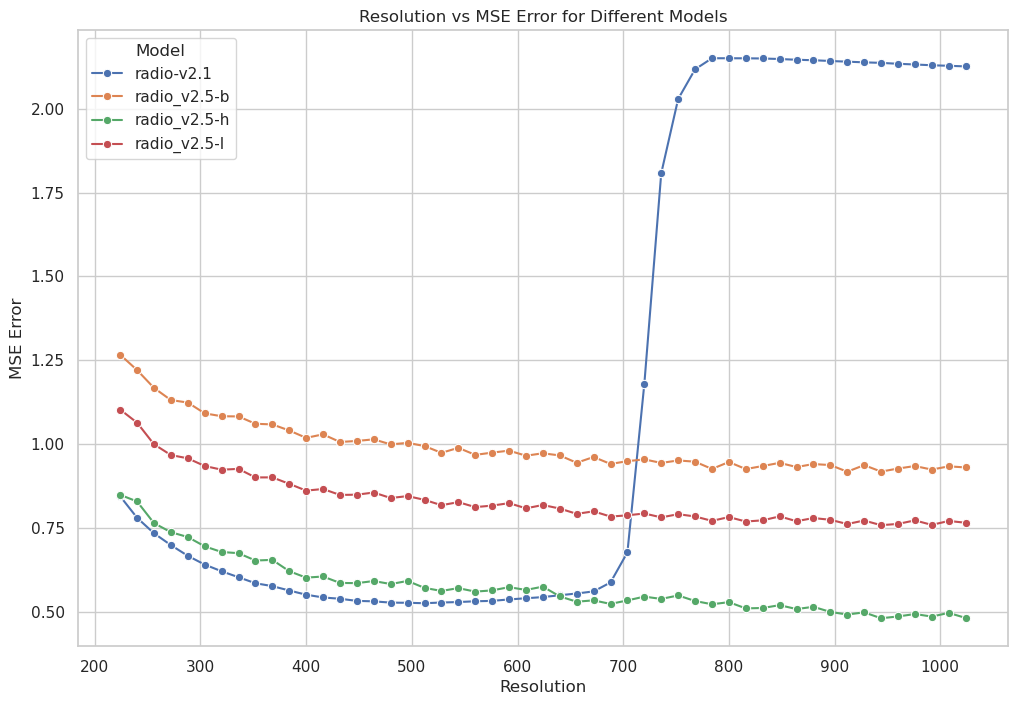

In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

PREFIX = 'mode_switching_results_'
data_files = []
for fname in os.listdir('.'):
    if fname.startswith(PREFIX):
        df = pd.read_csv(fname)
        mod_name = os.path.splitext(fname)[0][len(PREFIX):]
        data_files.append((df, mod_name))
data_files.sort(key=lambda t: t[1])

# Set the plot style
sns.set(style="whitegrid")

# Create a figure for the plots
plt.figure(figsize=(12, 8))

# Plotting the MSE Error for each model
for df, name in data_files:
    sns.lineplot(data=df, x='Resolution', y='MSE Error', label=name, marker='o')

# Adding titles and labels
plt.title('Resolution vs MSE Error for Different Models')
plt.xlabel('Resolution')
plt.ylabel('MSE Error')
plt.legend(title='Model')

plt.savefig('assets/radio_v2.5/mode_switching_dv2.png', format='png')
# Show the plot
plt.show()
